In [5]:
%run "../common.ipynb"

## Configuring Notebook

### Installing nbExtensions
[ ] pip install https://github.com/ipython-contrib/IPython-notebook-extensions/archive/master.zip --user



### Configuring nbExtensions

[ ] Go to  http://localhost:8888/nbextensions
[ ] select extentions that you need

In [26]:
%%javascript

MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Extension['TeX/AMSmath'].startNumber = 0;
MathJax.Hub.Queue(["Reprocess",MathJax.Hub]);

<IPython.core.display.Javascript object>

In [11]:
from sympy import *;
from sympy.physics import units as u;
from sympy.plotting import plot, plot_parametric

init_printing(use_latex='mathjax')
from collections import defaultdict

class GenerateSymbols(defaultdict):
    def __missing__(self, key):
        self[key] = Symbol(key)
        return self[key]

def plotit(expr, showPlot=False, xr = None, yr = None, zr= None):
    a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z = symbols("a b c d e f g h i j k l m n o p q r s t u v w x y z")
    symbs= GenerateSymbols()
    expr = eval(expr,symbs);
    #xr = eval(xr,symbs)
    title=latex(expr)
    title = '$'+title+'$'
    titEs = title.replace("\\","\\\\")
    if (showPlot):
        display(expr)
        xr = (x,0,5) if xr is None else xr; 
        yr = (y,0,5) if yr is None else yr; 
        zr = (z,0,5) if zr is None else zr; 
        plot(expr, xr,yr,zr)
        #display(title)
    return title, titEs;

symbs= GenerateSymbols()

     1     
───────────
exp(-x) + 1

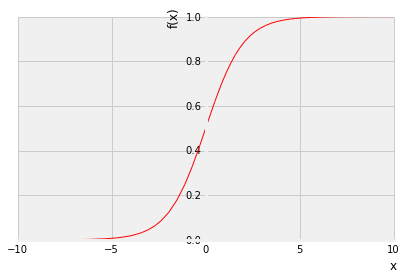

Latex commands $\frac{1}{\operatorname{exp}{\left (- x \right )} + 1}$
$\\frac{1}{\\operatorname{exp}{\\left (- x \\right )} + 1}$


In [13]:
#Usage of PlotIt functions are here

# To get Latex version of the expression
# Construct an expression and call plotit that returns 

expr = '1/(1+exp(-x))';
l, ll=plotit(expr, True)
print ("Latex commands", l+'\n'+ll)


In [17]:
#l,l1 = plotit('1/(1+exp(-x))', False)
a = 1.23

{{l, ll=plotit(expr, False)}}
a = {{l}}


<IPython.core.display.Javascript object>

\begin{equation}
E = F \cdot s 
\end{equation}

 <div style="width:50%;  display: inline;border: 0px solid black;">$E = F \cdot s $ </div>
 <div style="width:250px; display: inline;position: absolute; right: 450px; border: 0px solid black;">----------------(1)</div>


$$E = F \cdot s $$